# Table of Contents
[1. Objectives and Structure](#1)<br>
[2. Data Sets](#2)<br>
[3. Demo](#3)<br>
&nbsp;&nbsp;&nbsp;[3.1 Feature Engineering and Data Cleaning](#4)<br>
&nbsp;&nbsp;&nbsp;[3.2 Univariate Analysis](#5)<br>
&nbsp;&nbsp;&nbsp;[3.3 Multivariate Analysis](#6)<br>
[4. Firmo](#7)<br>
&nbsp;&nbsp;&nbsp;[4.1 Feature Engineering and Data Cleaning](#8)<br>
&nbsp;&nbsp;&nbsp;[4.2 Univariate Analysis](#9)<br>
&nbsp;&nbsp;&nbsp;[4.3 Multivariate Analysis](#10)<br>

<hr class="solid">

# 1. Objectives and Structure
<a id="1"></a> 


**Main goal:** produce a  comprehensive  report  that  identifies  the  **main  customer  segments**,  accompanied  by  a **preliminary marketing plan** that will serve as a guide for future initiatives.

- Costumer Value segmentation
- Costumer Behavior segmentation

**Structure**
- **Exploration**: Population description  using statistical measures, visualizations, and business insights that reflect the most significant findings.
<br></br>
- **Preprocessing:** steps to transform raw data into prepared data for clustering:<br> &nbsp;&nbsp;-data cleaning, <br>&nbsp;&nbsp;-transformation(feature engineering)<br>&nbsp;&nbsp;-reduction.
<br></br>
- **Modelling:**  Implementation  of ML models.<br> &nbsp;&nbsp; **Obligatory:** costumer value & consumer  behavior

<hr class="solid">


# 2. Data Sets
<a id="2"></a> 

### Firmo


| Variable | Description |
| --- | --- |
| CustomerID | Customer unique identification |
| Date_Adherence | Date of customer adherence to company’s card |
| Recency | Number of days since the customer's last purchase |
| MntMeat&Fish | Amount spent on meat and fish dishes |
| MntEntries | Amount spent on entries |
| MntVegan&Vegetarian | Amount spent on Vegan and Vegetarian dishes |
| MntDrinks | Amount spent on drinks |
| MntDesserts | Amount spent on desserts |
| MntAdditionalRequests | Amount spent on additional requests |
| NumOfferPurchases | Number of purchases made using promotional offers |
| NumAppPurchases | Number of purchases made through food delivery apps |
| NumTakeAwayPurchases | Number of take-away purchases |
| NumInStorePurchases | Number of in-store purchases |
| NumAppVisitsMonth | Average number of accesses to the restaurant in food delivery apps |
| Complain | Flag indicating whether the customer has made a complaint |


### Demo


| Variable | Description |
| --- | --- |
| CustomerID | Customer unique identification |
| Name | Customer’s name |
| Birthyear | Customer’s year of birth |
| Education | Customer’s level of education |
| Marital_Status | Customer’s marital status |
| Income | Customer’s yearly household income |
| Kid_Younger6 | Number of kids younger than 6 in the household |
| Children_6to18 | Number of children between 6 and 18 years old in the household |


### Marketing

| Variable | Description |
| --- | --- |
| CustomerID | Customer unique identification |
| Response_Cmp1 | Flag indicating whether the customer accepted the offer in campaign 1 |
| Response_Cmp2 | Flag indicating whether the customer accepted the offer in campaign 2 |
| Response_Cmp3 | Flag indicating whether the customer accepted the offer in campaign 3 |
| Response_Cmp4 | Flag indicating whether the customer accepted the offer in campaign 4 |
| Response_Cmp5 | Flag indicating whether the customer accepted the offer in campaign 5 |

<hr class="solid">

### Imports
<a id="3"></a> 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)

In [2]:
demo = pd.read_csv("data/crm.csv")
mkt = pd.read_csv("data/mkt.csv")
sales = pd.read_excel("data/sales.xlsx")
df = demo.merge(sales).merge(mkt)

demo = demo.set_index('CustomerID')
mkt = mkt.set_index('CustomerID')
sales = sales.set_index('CustomerID')

<hr class="solid">

#  3. Demo
<a id="3"></a> 

#### 3.1 Feature Engineering and Data Cleaning
<a id="4"></a> 

##### Duplicates and NA

In [3]:
# Check duplicates
demo[demo.duplicated()].shape[0]
# Check NA - 14 on Education
demo.isnull().sum()

Name               0
Birthyear          0
Education         14
Marital_Status     0
Income             0
Kid_Younger6       0
Children_6to18     0
dtype: int64

##### Gender Column

In [4]:
demo['Gender'] = np.where(demo['Name'].str.contains('Mr.'), 'M', 'F')

##### Age Column

In [5]:
demo['Age'] = datetime.now().year - demo.Birthyear

##### Education

* Deal with Na - Fill with most frequent value?

* H1 - Divide Education in 3 labels: - Education_bins
    - High - Phd and Master
    - Medium - Graduation
    - Low - Basic + Highschool

In [6]:
#H1
demo.Education = demo.Education.str.title() 
demo['Education_bins'] = demo.Education.replace({
    'Phd': 'High',
    'Master' : 'High',
    'Graduation': 'Medium',
    'Basic' : 'Low',
    'Highschool' : 'Low'
})

##### Marital Status
* H1 - Merge into 2 categories: Together(Married + Together) & Alone(Single + Divorced + Widow) - Marital_Status_2
* H2 - Just merge Married + Together - Marital_Status_4

In [7]:
demo.Marital_Status = demo.Marital_Status.str.title()
demo.Marital_Status.value_counts()

#H1
demo['Marital_Status_2'] = demo.Marital_Status.replace({
    'Married' : 'Together',
    'Single' : 'Alone',
    'Divorced' : 'Alone',
    'Widow' : 'Alone'
})
#H2
demo['Marital_Status_4'] = demo.Marital_Status.replace('Together','Married')


##### Income
* H1 -  Use as is (treat it as a discrete quantitative var - all values are ints)
* H2 - Bin it into 3 categories - Income_bins

In [8]:
# H1 -  Min-Max scaling 

demo_copy = demo.copy()
min_income = min(demo_copy['Income'])
max_income = max(demo_copy['Income'])

income_norm = [(x - min_income) / (max_income - min_income) for x in demo_copy['Income']]

In [9]:
demo_copy['Income'] = income_norm
demo_copy.head()

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Gender,Age,Education_bins,Marital_Status_2,Marital_Status_4
CustomerID,,,,,,,,,,,,
14594,Miss Leah Lewis,1981,Graduation,Single,0.473975,0,0,F,42,Medium,Alone,Single
19070,Miss Grace Black,1974,Graduation,Together,0.475463,0,0,F,49,Medium,Together,Married
29888,Mr. Gavin Morrison,1960,Phd,Together,0.480477,0,0,M,63,High,Together,Married
12221,Mr. Ryan Glover,1980,Graduation,Married,0.419647,1,1,M,43,Medium,Together,Married
21107,Mr. Paul Anderson,1971,Highschool,Single,0.513018,0,0,M,52,Low,Alone,Single


In [10]:
#H2
demo['Income_bins']  = pd.cut(demo.Income,3, labels=["Low", "Medium", "High"])

#### 3.2 Univariate Analysis
<a id="5"></a> 

##### Categorical
- 14 Na in Education


In [11]:
demo.describe(include='O')

,Name,Education,Marital_Status,Gender,Education_bins,Marital_Status_2,Marital_Status_4
count,7000,6986,7000,7000,6986,7000,7000
unique,6241,5,5,2,3,2,4
top,Mr. Stewart Grant,Graduation,Married,M,Medium,Together,Married
freq,3,3504,2866,5531,3504,4572,4572


##### Quantitative
- 86 possible outliers in Income
- Fairly normal distributions


In [12]:
demo.describe()

,Birthyear,Income,Kid_Younger6,Children_6to18,Age
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,1976.451429,77988.962407,0.440571,0.490571,46.548571
std,11.996270,35409.810253,0.543477,0.542174,11.996270
min,1948.000000,2493.800000,0.000000,0.000000,18.000000
25%,1967.000000,51586.250000,0.000000,0.000000,38.000000
50%,1977.000000,77190.000000,0.000000,0.000000,46.000000
75%,1985.000000,102016.250000,1.000000,1.000000,56.000000
max,2005.000000,237639.725000,2.000000,2.000000,75.000000


In [13]:
demo.skew(numeric_only=True)

Birthyear        -0.092478
Income            0.844721
Kid_Younger6      0.693587
Children_6to18    0.451693
Age               0.092478
dtype: float64

In [14]:
demo.kurt(numeric_only=True)

Birthyear        -0.857341
Income            2.649035
Kid_Younger6     -0.651127
Children_6to18   -0.973333
Age              -0.857341
dtype: float64

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Gender,Age,Education_bins,Marital_Status_2,Marital_Status_4,Income_bins
CustomerID,,,,,,,,,,,,,
28976,Mr. Matt Skinner,1963,Graduation,Single,232427.925,0,2,M,60,Medium,Alone,Single,High
19586,Mr. Jonathan Payne,1956,Master,Married,237639.725,0,0,M,67,High,Together,Married,High
7685,Mr. Evan Nolan,1980,Graduation,Single,227406.225,2,1,M,43,Medium,Alone,Single,High
20405,Mr. Stephen Paterson,1967,Master,Married,229052.725,0,1,M,56,High,Together,Married,High
32414,Mr. Oliver Cornish,1989,Phd,Married,233789.525,0,0,M,34,High,Together,Married,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15314,Mr. Steven Dyer,1960,Phd,Married,231427.925,0,1,M,63,High,Together,Married,High
5132,Mrs. Lillian Stewart,1973,Master,Married,227063.725,0,0,M,50,High,Together,Married,High
25934,Mr. Jonathan Hudson,1977,Master,Divorced,232511.725,0,1,M,46,High,Alone,Divorced,High


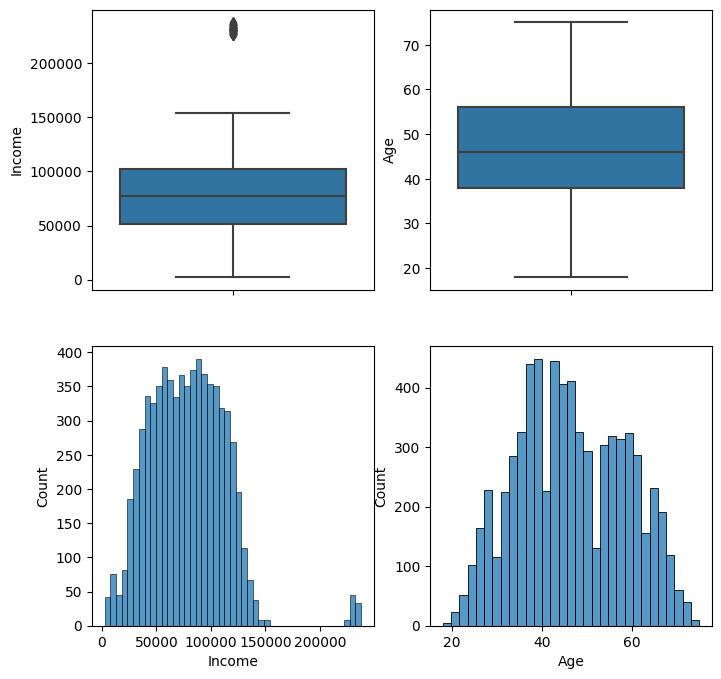

In [15]:
fig, axs = plt.subplots(2,2, figsize=(8, 8))
sns.boxplot(y=demo.Income, ax=axs[0,0])
sns.boxplot( y=demo.Age, ax=axs[0,1])
sns.histplot(data=demo.Income, ax=axs[1,0])
sns.histplot(data=demo.Age, ax=axs[1,1])

demo[demo.Income > 200000]

#### 3.3 Multivariate Analysis
<a id="6"></a> 

- Moderate correlation between Kid_Younger6 and Income

<Axes: >

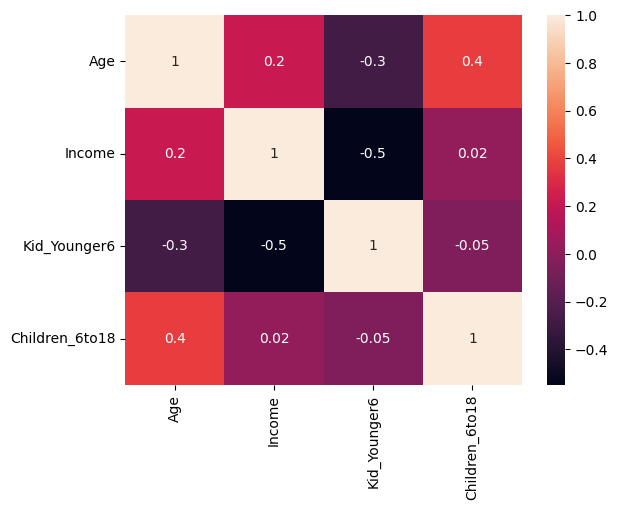

In [16]:
corr = demo[['Age','Income','Kid_Younger6','Children_6to18']].corr(method='spearman')
sns.heatmap(data=corr, annot=True, fmt = '.1g')

# 4. Firmo
<a id="7"></a> 

#### 4.1 Feature Engineering and Data Cleaning
<a id="8"></a> 

##### Duplicates and NA

- Recency - 23 
- MntDrinks - 28

In [17]:
# Check duplicates
sales[sales.duplicated()].shape[0] #were 8
sales.drop_duplicates(inplace=True)
# Check NA - 14 on Education
sales.isnull().sum()

Date_Adherence            0
Recency                  23
MntMeat&Fish              0
MntEntries                0
MntVegan&Vegetarian       0
MntDrinks                28
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0
Complain                  0
dtype: int64

##### Antiquity Creation - Antiquity
(how many year does the client has the company card)

In [18]:
sales[sales.Date_Adherence.apply(lambda x: isinstance(x, str))]                                         #16 cases of string 2/29/2022
sales.loc[sales.Date_Adherence.apply(lambda x: isinstance(x, str)), 'Date_Adherence'] = '3/01/2022'     # Converted to 3/01/2022 and to datetime object
sales['Date_Adherence'] = pd.to_datetime(sales['Date_Adherence'])
sales['Antiquity'] = datetime.today().year - sales['Date_Adherence'].dt.year

##### Frequency Creation - Freq
(number of purchases multichannel)

In [19]:
sales['Freq'] = sales[['NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases']].sum(axis=1)

##### Total Spent Creation - Mnt_total

In [20]:
sales['Mnt_Total'] = sales[['MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts','MntAdditionalRequests']].sum(axis=1)

##### Money spent on average per purchase - Avg_Ticket

In [21]:
sales['Avg_Ticket']= sales.Mnt_Total / sales.Freq

### 4.2 Univariate Analysis
<a id="9"></a> 

In [23]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,6977.0,49.235058,28.922688,0.000000,24.000000,49.000000,74.000000,99.0
MntMeat&Fish,7000.0,3079.523800,3370.377166,0.000000,250.000000,1820.000000,5070.000000,14980.0
MntEntries,7000.0,534.749429,787.846684,0.000000,40.000000,180.000000,680.000000,3980.0
MntVegan&Vegetarian,7000.0,2785.050786,3908.718244,0.000000,240.000000,1110.000000,3795.000000,25974.0
MntDrinks,6972.0,545.657544,805.149088,0.000000,40.000000,180.000000,700.000000,3980.0
MntDesserts,7000.0,540.656029,802.221866,0.000000,40.000000,180.000000,680.000000,3980.0
MntAdditionalRequests,7000.0,42.556186,49.650747,0.000000,9.000000,24.000000,57.000000,249.0
NumOfferPurchases,7000.0,2.448429,2.306968,0.000000,1.000000,2.000000,3.000000,16.0
NumAppPurchases,7000.0,6.015714,2.745537,0.000000,4.000000,6.000000,8.000000,13.0
NumTakeAwayPurchases,7000.0,3.834571,3.331142,0.000000,1.000000,3.000000,5.000000,24.0


In [24]:
#Avg_Ticket  with inf values because there's an inconsistence - 38 costumers who spent money but never went/orderd food from the restaurant
# If we default Freq to 1 - there's 2 high values (+/- 20k) that will skew Avg_Ticket
#Also 2 ppl that went only once but spent +/- 20.5k - will also skew Avg_Ticket

print(sales.loc[(sales.Freq == 0) & (sales.Mnt_Total > 0)].shape, '\n',
sales.loc[(sales.Freq == 1) & (sales.Mnt_Total > 20000)].shape)

(38, 18) 
 (2, 18)


In [25]:
sales.skew(numeric_only=True)[(sales.skew(numeric_only=True).values >1) | (sales.skew(numeric_only=True).values <-1)]


MntMeat&Fish             1.148862
MntEntries               2.087220
MntVegan&Vegetarian      2.486897
MntDrinks                2.046308
MntDesserts              2.057811
MntAdditionalRequests    1.826522
NumOfferPurchases        2.860514
NumTakeAwayPurchases     2.254158
NumAppVisitsMonth        1.005192
Complain                 9.709429
dtype: float64

In [26]:
sales.kurt(numeric_only=True)[(sales.kurt(numeric_only=True)>3) | (sales.kurt(numeric_only=True)<-3)]

MntEntries                4.096167
MntVegan&Vegetarian       8.431538
MntDrinks                 3.839256
MntDesserts               3.813464
MntAdditionalRequests     3.084190
NumOfferPurchases        10.997946
NumTakeAwayPurchases      8.582138
NumAppVisitsMonth         4.992870
Complain                 92.299387
dtype: float64

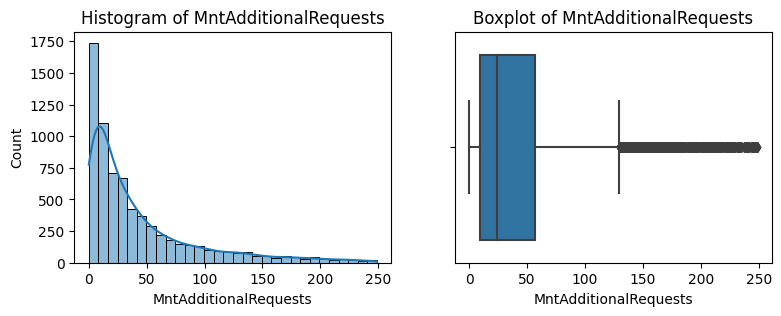

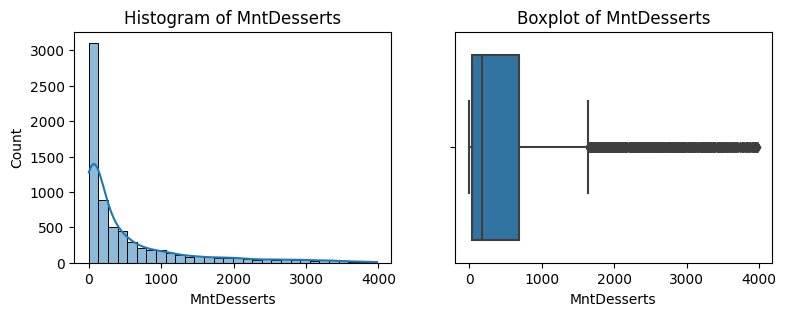

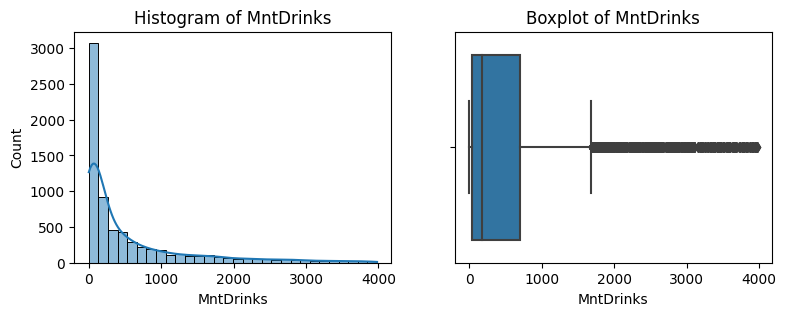

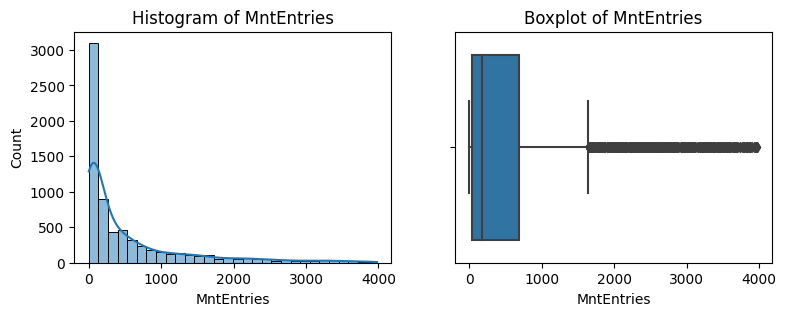

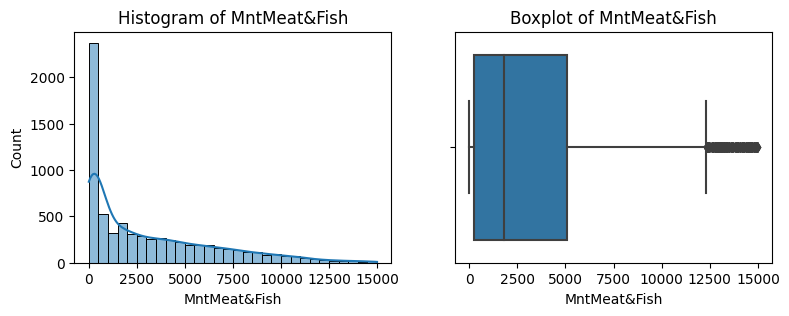

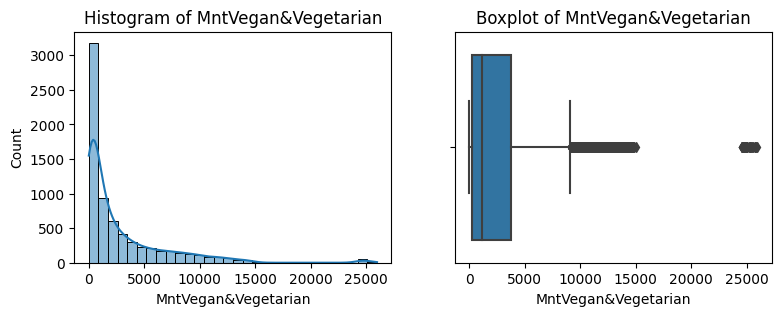

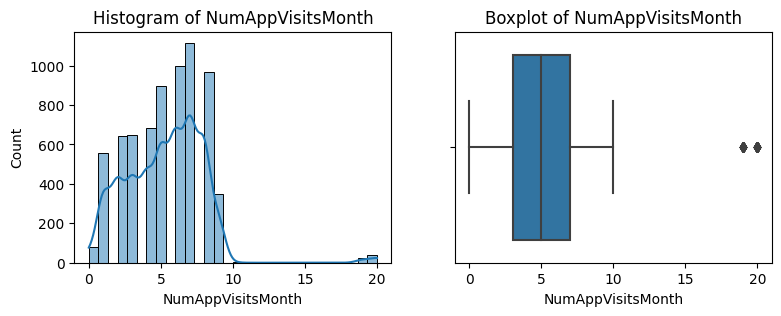

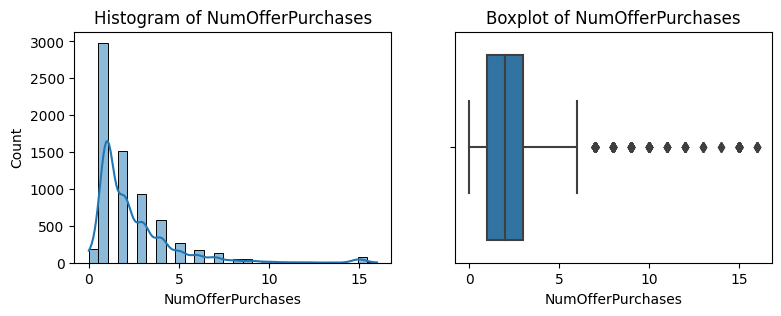

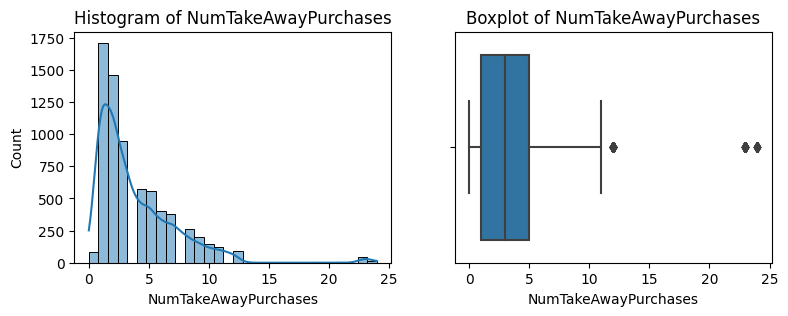

In [64]:
problematic = sales[[
'MntAdditionalRequests',
 'MntDesserts',
 'MntDrinks',
 'MntEntries',
 'MntMeat&Fish',
 'MntVegan&Vegetarian',
 'NumAppVisitsMonth',
 'NumOfferPurchases',
 'NumTakeAwayPurchases']]

for i in problematic:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
    sns.histplot(ax=ax1, x=sales[i], bins=30,kde= True)
    sns.boxplot(ax=ax2, x=sales[i])
    ax1.set_title(f"Histogram of {i}")
    ax2.set_title(f"Boxplot of {i}")
    plt.show()


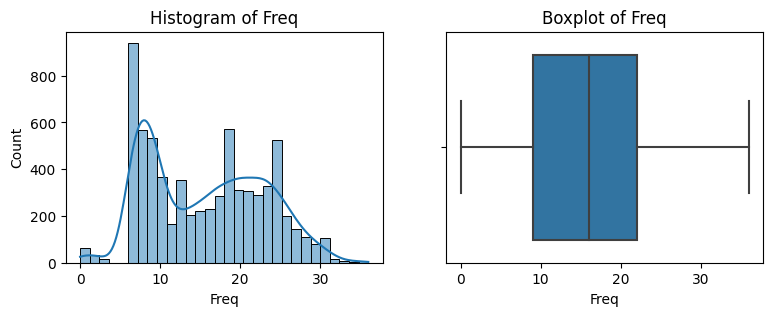

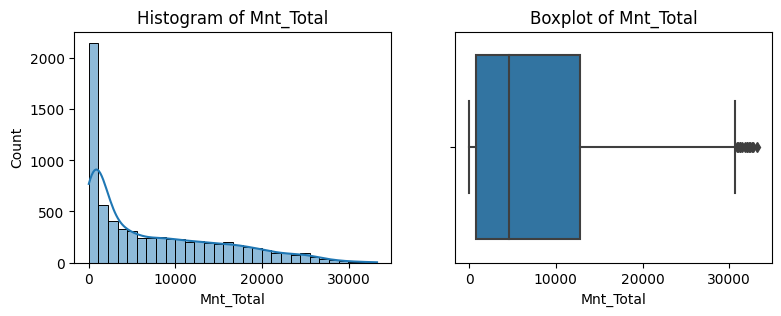

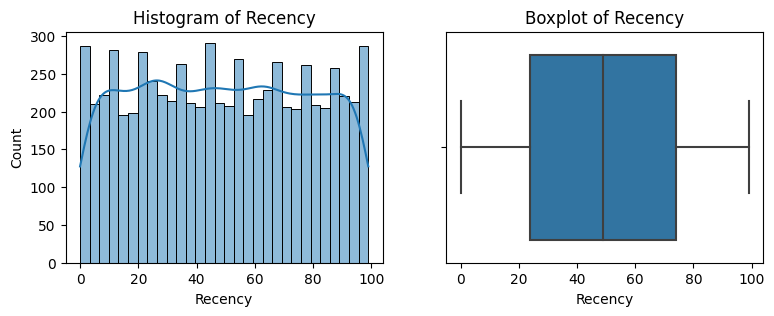

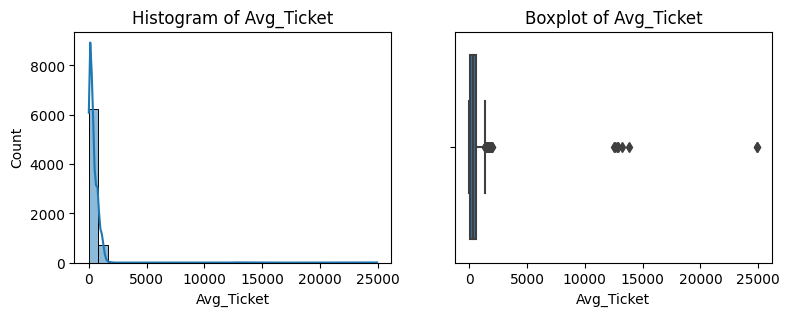

In [65]:
a = sales[[
'Freq',
'Mnt_Total',
'Recency',
'Avg_Ticket']]

for i in a:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
    sns.histplot(ax=ax1, x=sales[i], bins=30,kde= True)
    sns.boxplot(ax=ax2, x=sales[i])
    ax1.set_title(f"Histogram of {i}")
    ax2.set_title(f"Boxplot of {i}")
    plt.show()

Conclusions:
- Freq, Mnt_Total, Avg_Ticket and Recency after outlier removal and maybe transformation (to help normalize) seem good indicators of costumer behavior for the model
- If we want to use the other variables to: cluster by type of food; cluster by type of channel used - we clearly have to apply a transformation technique (besides removing outliers)
* We can also try :
    - an aproach of ratios  mapping 1 to a costumer who as a higher ratio of meat by total purchases and 0 on the other food types (same with channel)
    - investigate a possible relation between beverage and dessert consumption and other behaviors...(thinking in marketing terms, like does it make sense to advertise or give drink coupon to try to rise sales in x group)
    - Investigate if there are ppl who visit the app many times but don't buy nothing - possible bottleneck - ux sucks? possible marketing campaign dedicated to those cases

### 4.3 Multivariate Analysis
<a id="9"></a> 

C:\Users\Diogo\AppData\Local\Temp\ipykernel_37468\1593738059.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_corr = sales.corr(method = 'spearman')[(sales.corr(method = 'spearman') > 0.5) | (sales.corr(method = 'spearman') < -0.5)]


<Axes: >

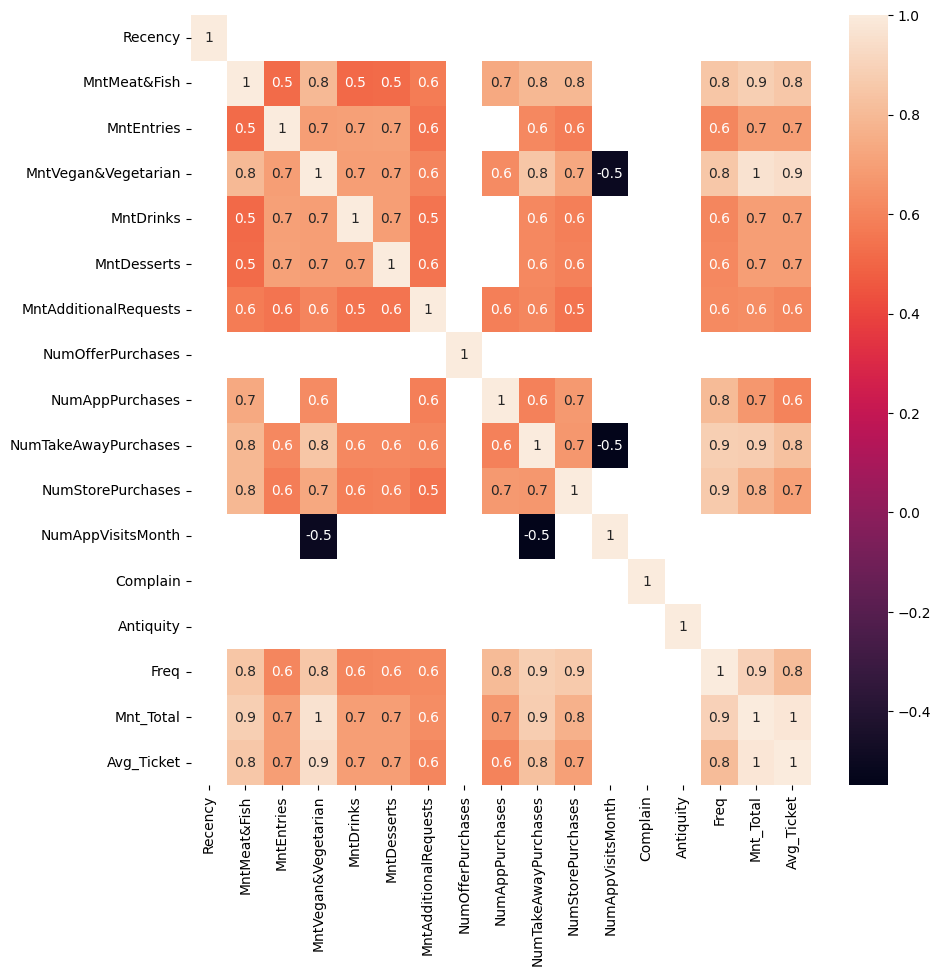

In [103]:
#Suggests that specific vars(by type of food and channel used) and sum total vars(Freq, Mnt_Total, Avg_Ticket) 
# are two different approaches and doesn't make sense when used together
plt.figure(figsize=(10,10))
sales_corr = sales.corr(method = 'spearman')[(sales.corr(method = 'spearman') > 0.5) | (sales.corr(method = 'spearman') < -0.5)]
sns.heatmap(sales_corr, annot=True, fmt = '.1g')

<Axes: >

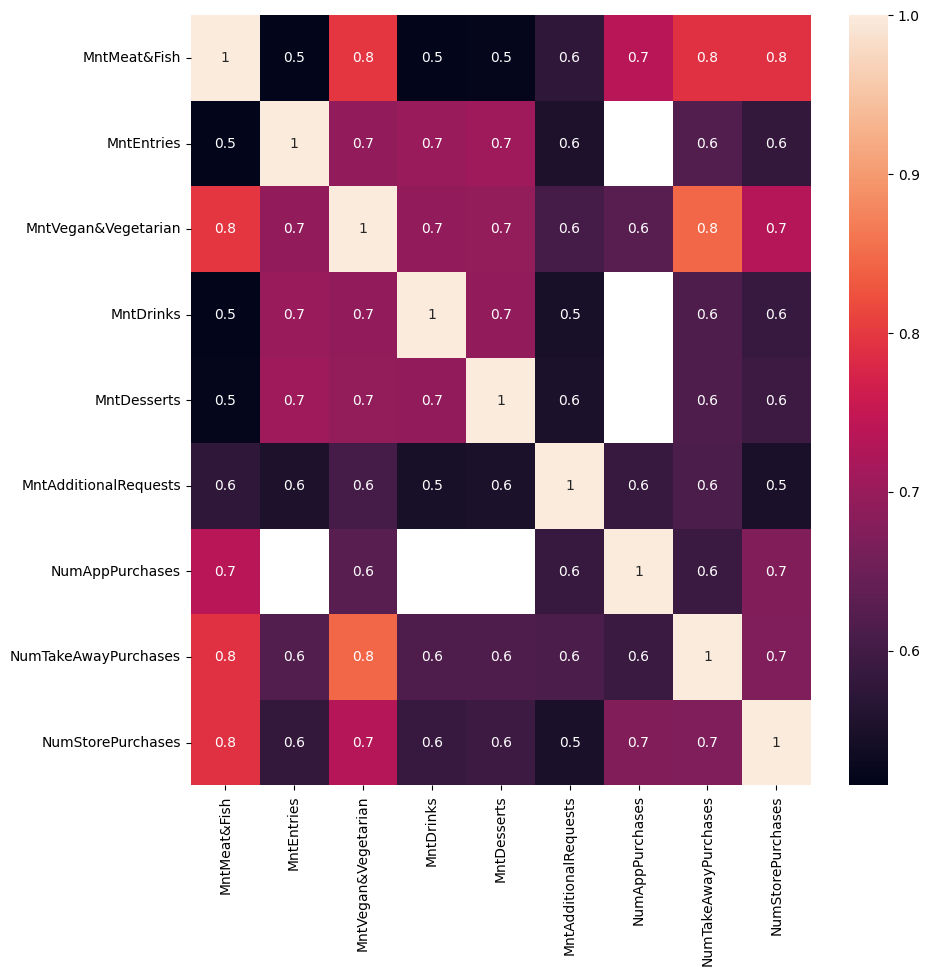

In [126]:
# Only corrs between "types of food" and channels
# High correlations all around
sales_foodtype_channel = sales[['MntMeat&Fish', 'MntEntries',
       'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
       'MntAdditionalRequests', 'NumAppPurchases',
       'NumTakeAwayPurchases', 'NumStorePurchases']]

plt.figure(figsize=(10,10))
sales_foodtype_channel_corr = sales_foodtype_channel.corr(method = 'spearman')[(sales_foodtype_channel.corr(method = 'spearman') > 0.5) | (sales_foodtype_channel.corr(method = 'spearman') < -0.5)]
sns.heatmap(sales_foodtype_channel_corr, annot=True, fmt = '.1g')

<Axes: >

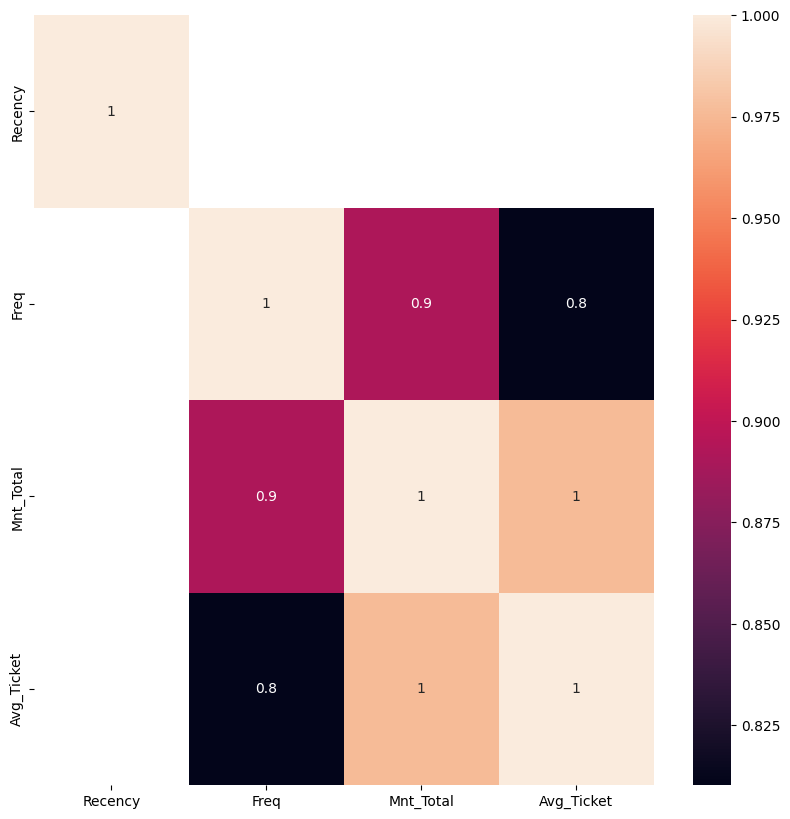

In [131]:
# Corrs between "sumed vars"
# Also high correlation - expected
sales_sums = sales[['Recency', 'Freq', 'Mnt_Total', 'Avg_Ticket']]

plt.figure(figsize=(10,10))
sales_sums_corr = sales_sums.corr(method = 'spearman')[(sales_sums.corr(method = 'spearman') > 0.5) | (sales_sums.corr(method = 'spearman') < -0.5)]
sns.heatmap(sales_sums_corr, annot=True, fmt = '.1g')

<Axes: xlabel='Mnt_Total', ylabel='Freq'>

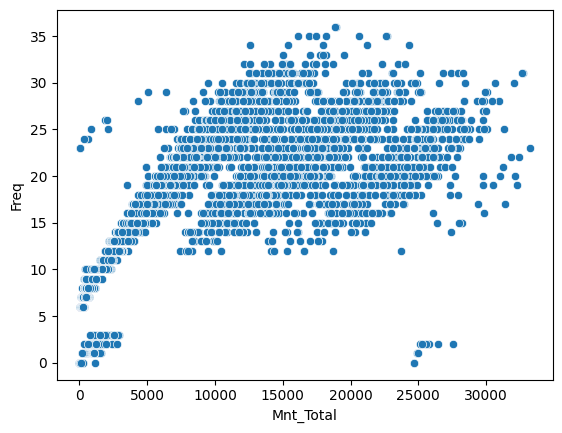

In [134]:
# Here's the clusters boys! *mic drop* i guess...
# Bit of trash around and outliers
#Maybe we should give DBSCAN a go bcs elipse shapes
sns.scatterplot( x=sales.Mnt_Total, y=sales.Freq)

In [132]:
# Way to test for multicollinearity - need to treat nulls first to check other vars ( if not above 5 we're good)
from statsmodels.stats.outliers_influence import variance_inflation_factor
sales_mc= sales[['MntMeat&Fish', 'MntEntries',
       'MntVegan&Vegetarian',  'MntDesserts',
       'MntAdditionalRequests']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = sales_mc.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(sales_mc.values, i)
                          for i in range(len(sales_mc.columns))]
vif_data


,feature,VIF
0,MntMeat&Fish,2.461759
1,MntEntries,2.407168
2,MntVegan&Vegetarian,2.261687
3,MntDesserts,2.419244
4,MntAdditionalRequests,2.036670


In [133]:
#Possible inconsistence, no visits on avg but at least 1 app purchase
sales[(sales.NumAppVisitsMonth == 0) & (sales.NumAppPurchases >0)].shape

(57, 18)